In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import ms_analysis as msa
mc = msa.MSout("../ms_out/pH7eH0ms.txt")
ms_orig_lst = [[ms.E, ms.count, ms.state] for  ms in list((mc.microstates.values()))]
ms_orig_lst = sorted(ms_orig_lst, key = lambda x:x[0])

In [3]:
energy_lst_count =np.asarray([a for a,f in zip([x[0] for x in ms_orig_lst], [x[1] for x in ms_orig_lst]) for _ in range(f)])


-174.49745041346907 1.6747856213046677
2.857179297479374 -176.40940217209499 2.54174586045566


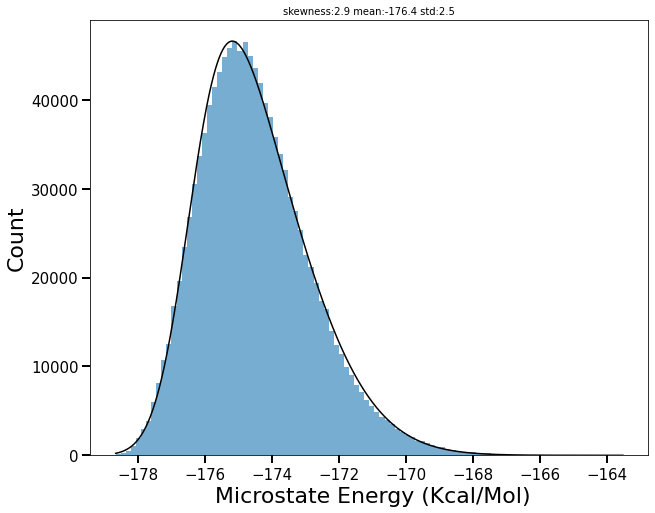

In [4]:
# This is to fit the equation
from scipy.stats import norm, skewnorm
(mu, sigma) = norm.fit(energy_lst_count)
skewness, mean, std = skewnorm.fit(energy_lst_count)

print(mu, sigma)
print(skewness, mean, std)
fig = plt.figure(figsize = (10,8))
graph_hist = plt.hist(energy_lst_count,bins=100, alpha=0.6)
Y = graph_hist[0]
y = skewnorm.pdf(np.array(energy_lst_count), skewness, mean, std)
pdf_data = Y.max()/max(y)*y
plt.plot(energy_lst_count,pdf_data , label = 'approximated skewnorm', color = 'black')
plt.title("skewness:"+str(round(skewness,1))+" mean:"+str(round(mean,1))+" std:"+str(round(std,1)), fontsize = 10)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel(" Microstate Energy (Kcal/Mol)", fontsize = 22)
plt.ylabel("Count", fontsize = 22)
plt.tick_params(axis="x", direction="out", length=8, width=2)
plt.tick_params(axis="y", direction="out", length=8, width=2)
#fig.savefig("enthalpy_dis.pdf", dpi = 600, bbox_inches = "tight");

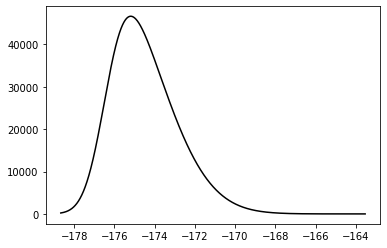

In [5]:
# The fitting looks good and lets find the maximum value from fitted smooth  below curve
plt.plot(energy_lst_count, pdf_data, label = 'approximated skewnorm', color = 'black')



In [6]:
def FWHM(input_pdf_data, energy_list):
    if len(input_pdf_data) != len(energy_list):
        return "Input data length doesn't match"
    max_pdf = np.max(input_pdf_data)
    max_pdf_position = np.where(input_pdf_data == max_pdf)
    #print(max_pdf_position)
    #print(max_pdf)
    half_max = max_pdf // 2
    #print(half_max)
    
    # divide the data into two halves based on the max position
    max_pdf_position_1st = max_pdf_position[0][0]
    left_half = input_pdf_data[:max_pdf_position_1st]
    right_half = input_pdf_data[max_pdf_position_1st:]
    
    # lets find the half_max position in two list
    # traverse from reverse for first half
    left_half_po = 0
    for left in range(len(left_half)-1, -1, -1):
            diff_left = left_half[left] - half_max
            if diff_left < 0:
                left_half_po = left
                # compare which one is closed
                break
  
    #chose the number near to half_max
    if abs(left_half[left_half_po] - half_max) > abs(left_half[left_half_po + 1] - half_max):
            left_half_po += 1
    #print(left_half_po)
    
    right_half_po = 0
    for right in range(len(right_half)):
        diff_right = right_half[right] - half_max
        if diff_right < 0:
            right_half_po  = right
            # compare which one is closed
            break
    # chose the number near to half_max
    if abs(right_half[right_half_po] - half_max) > abs(right_half[right_half_po-1] - half_max):
            right_half_po -= 1
    #print(right_half_po)


    halfwidth = round(abs(energy_list[left_half_po] - energy_list[len(left_half) + right_half_po]),3)
    
    return halfwidth, energy_list[left_half_po], energy_list[len(left_half) + right_half_po], half_max, energy_lst_count
    


In [7]:
data_out= FWHM(pdf_data, energy_lst_count)
print(data_out[0])

3.61


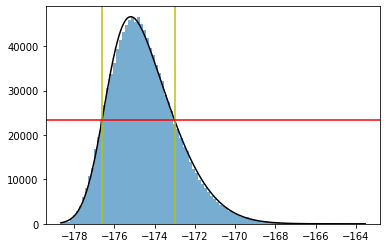

In [8]:
# The fitting looks good and lets draw the line
plt.plot(energy_lst_count, pdf_data, label = 'approximated skewnorm', color = 'black')
graph_hist = plt.hist(energy_lst_count,bins=100, alpha=0.6)
plt.axvline(x=data_out[1], color='y')
plt.axvline(x=data_out[2], color='y')
#plt.ayvline(x=data_out[3], color='y')
plt.axhline(y=data_out[3], color='r');

In [9]:
# 4lzt
#ph: 4, 5, 6, 7
#4.657, 4.223, 3.928, 3.61
